#  <span style="color:blue">AutoML com Pycaret</span>


# Prática 08

Nesta prática você vai aprender:

* **Carga dos dados:**  Como importar dados para utilizar o Pycaret.
* **Configuração do ambiente:**  Como configurar um experimento no Pycaret e iniciar a construção de modelos de NLP.
* **Criação de um modelo:**  Como criar um modelo, realizar cross validation e avaliar as métricas.
* **Otimização do modelo:**  Como automaticamente ajustar os hiperparametros de um modelo de tópicos.
* **Análise de performance do modelo:**  Como analisar a performance do modelo utilizando gráficos.
* **Finalizar o modelo:** Como finalizar o melhor modelo e concluir o experimento.
* **Realizar predições:**  Como fazer predições para novos dados.
* **Salvar e Carregar o modelo:**  Como salvar e carregar o modelo para uso futuro.

## 1.1 Instalando o PyCaret

#### Instalando o PyCaret em um Jupyter Notebook Local.
`pip install pycaret`  <br />

#### Instalando o PyCaret utilizando o Google Colab ou Azure Notebooks.
`!pip install pycaret`


## 1.2 Pré-Requisitos
- Python 3.6 ou superior
- Conexão com a internet para carregar dados a partir do repositório do Pycaret.

## 1.3 No Google colab execute:
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`

#### Instalando o Pycaret.

In [ ]:
!pip install pycaret

#### Carregando o módulo de NLP e a função para buscar dados.

In [ ]:
from pycaret.nlp import *
from pycaret.datasets import get_data
import pandas as pd
pd.set_option("display.max_columns", 1000)

# Conjunto de dados utilizado.

Para este tutorial, usaremos dados do Kiva Microfunds https://www.kiva.org/. 

Kiva Microfunds é uma organização sem fins lucrativos que permite que indivíduos emprestem dinheiro a empreendedores e estudantes de baixa renda em todo o mundo. 


Features:

- **country:** País do mutuário.
- **en:** História pessoal do mutuário quando solicitou empréstimo.
- **gender:** Gênero (M=masculino, F=feminino).
- **loan_amount:** Valor do empréstimo aprovado e desembolsado.
- **nonpayment:** Tipo de credor (Credor = usuário pessoal registrado no site da Kiva, Parceiro = instituição de microfinanças que trabalha com a Kiva para encontrar e financiar empréstimos).
- **sector:** Setor do mutuário.
- **status:** Status do empréstimo (1-default, 0-reembolsado).

#### Carregando os dados.

In [ ]:
dataset = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      6818 non-null   object
 1   en           6818 non-null   object
 2   gender       6818 non-null   object
 3   loan_amount  6818 non-null   int64 
 4   nonpayment   6818 non-null   object
 5   sector       6818 non-null   object
 6   status       6818 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 373.0+ KB


#### Gerando amostra com apenas mil registros

In [ ]:
dataset = dataset.sample(1000, random_state=786).reset_index(drop=True)

In [ ]:
dataset["en"]

0      Praxides is married with four children who are...
1      Dr. Odongo is an obs/ gynaecology practitioner...
2      Ana Josefa is a single mother  living in San C...
3      Phanice is married with seven children. She ha...
4      Fredrice Nzioka Kilonzo is 26 years old and ow...
                             ...                        
995    Mariel Mara is twenty-two years old and lives ...
996    Antonia and her husband live in the small east...
997    Maria lives in Dolorosa sector, Pacha communit...
998    <p>Jose is a fruit and vegetable distributor w...
999    Carmita has 2 years of experience with this bu...
Name: en, Length: 1000, dtype: object

#### Verificando a forma dos dados.

In [ ]:
dataset.shape

(1000, 7)

#### Verificando as informações dos atributos.

In [ ]:
dataset.describe()

,loan_amount,status
count,1000.000000,1000.000000
mean,710.775000,0.496000
std,567.840838,0.500234
min,25.000000,0.000000
25%,325.000000,0.000000
50%,600.000000,0.000000
75%,1000.000000,1.000000
max,5000.000000,1.000000


# Configurando o ambiente do Setup

**Pré-Processamentos realizados automaticamente durante o setup**

- **Removing Numeric Characters:** All numeric characters are removed from the text. They are replaced with blanks.<br/>
<br/>
- **Removing Special Characters:** All non-alphanumeric special characters are removed from the text. They are also replaced with blanks.<br/>
<br/>
- **Word Tokenization:** Word tokenization is the process of splitting a large sample of text into words. This is the core requirement in natural language processing tasks where each word needs to be captured separately for further analysis. __[Read More](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)__ <br/>
<br/> 
- **Stopword Removal:** A stop word (or stopword) is a word that is often removed from text because it is common and provides little value for information retrieval, even though it might be linguistically meaningful. Example of such words in english language are: "the", "a", "an", "in" etc. __[Read More](https://en.wikipedia.org/wiki/Stop_words)__ <br/>
<br/>
- **Bigram Extraction:** A bigram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. For example: word New York is captured as two different words "New" and "York" when tokenization is performed but if it is repeated enough times, Bigram Extraction will represent the word as one i.e. "New_York"  __[Read More](https://en.wikipedia.org/wiki/Bigram)__ <br/>
<br/>
- **Trigram Extraction:** Similar to bigram extraction, trigram is a sequence of three adjacent elements from a string of tokens. __[Read More](https://en.wikipedia.org/wiki/Trigram)__ <br/>
<br/>
- **Lemmatizing:** Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single word, identified by the word's lemma, or dictionary form. In English language, word appears in several inflected forms. For example the verb 'to walk' may appear as 'walk', 'walked', 'walks', 'walking'. The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word. __[Read More](https://en.wikipedia.org/wiki/Lemmatisation)__ <br/>
<br/>
- **Custom Stopwords:** Many times text contains words that are not stopwords by the rule of language but they add no or very little information. <br/>
<br/>

**Requisitos :** Para algumas funcionalidades é preciso o modelo de linguagem na linha inglesa. Execute os comandos abaixo para fazer o download.

`python -m spacy download en_core_web_sm` <br/>
`python -m textblob.download_corpora` <br/>

In [ ]:
!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora

  Using cached en_core_web_sm-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package brown to
[nltk_data]     /Users/felipesantana/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/felipesantana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/felipesantana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/felipesantana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/felipesantana/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     

In [ ]:
from pycaret.nlp import *
exp_nlp101 = setup(data = dataset, target = 'en', session_id = 123)

Description,Value
session_id,123
Documents,1000
Vocab Size,4615
Custom Stopwords,False


##### Verificando os dados processados

In [ ]:
print(get_config("data_")["en"])

0      praxide marry child primary school train tailo...
1      gynaecology practitioner run year old life wif...
2      live child boy girl range year old sell new us...
3      phanice marry child daughter secondary school ...
4      year old hotel last year get good return compe...
                             ...                        
995    year old life year ago high school student bri...
996    live small eastern town raise child age espera...
997    live community minute city climate similar var...
998    distributor sell small store market borrow tru...
999    year experience business first sister first hi...
Name: en, Length: 1000, dtype: object


##### Verificando as palavras tokenizadas

In [ ]:
print(get_config("text")[:2])

[['praxide', 'marry', 'child', 'primary', 'school', 'train', 'tailor', 'also', 'operate', 'small', 'shop', 'supplement', 'tailoring', 'business', 'business', 'able', 'meet', 'familys_basic_need', 'addition', 'carry', 'business', 'praxide', 'also', 'employ', 'local', 'clothing', 'shop', 'train', 'student', 'clothe', 'design', 'tailor', 'give', 'loan', 'praxide', 'intend', 'expand', 'tailor', 'shop', 'also', 'start', 'train', 'facility', 'lady', 'try', 'good', 'empower', 'financially', 'support', 'young', 'family'], ['gynaecology', 'practitioner', 'run', 'year', 'old', 'life', 'wife', 'child', 'biological', 'adopt', 'currently', 'school', 'train', 'medical', 'doctor', 'work', 'government', 'year', 'resign', 'government', 'start', 'private', 'facility', 'facility', 'gradually', 'expand', 'recent', 'past', 'owe', 'previous', 'microfinance', 'loan', 'receive', 'kmet', 'able', 'incorporate', 'number', 'health', 'service', 'offer', 'improved', 'quality', 'carry', 'good_reputation', 'many', 'y

##### Lista com o id de cada palavra e seu mapeamento

In [ ]:
get_config("corpus")

[[(0, 1),
  (1, 1),
  (2, 3),
  (3, 3),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 3),
  (26, 1),
  (27, 1),
  (28, 3),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 3),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 1)],
 [(0, 1),
  (4, 1),
  (5, 1),
  (11, 2),
  (12, 2),
  (17, 1),
  (20, 1),
  (27, 1),
  (30, 1),
  (36, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 3)],
 [(2, 2),
  (5, 1),
  (7, 4),
  (13, 2),
  (20, 1),
  (33, 1),
  

# Criando a Modelagem de Tópicos

In [ ]:
lda = create_model('lda')

In [ ]:
print(lda)

LdaModel(num_terms=4615, num_topics=4, decay=0.5, chunksize=100)


# Atribuindo o modelo aos dados

In [ ]:
dataset_topics = assign_model(lda)
dataset_topics.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry child primary school train tailo...,F,75,partner,Services,0,0.169828,0.007741,0.821958,0.000473,Topic 2,0.82
1,Kenya,gynaecology practitioner run year old life wif...,M,1200,partner,Health,0,0.004903,0.335249,0.659392,0.000456,Topic 2,0.66
2,Dominican Republic,live child boy girl range year old sell new us...,F,150,partner,Clothing,0,0.522153,0.099910,0.377378,0.000559,Topic 0,0.52
3,Kenya,phanice marry child daughter secondary school ...,F,150,lender,Services,1,0.051998,0.105731,0.841686,0.000585,Topic 2,0.84
4,Kenya,year old hotel last year get good return compe...,F,300,lender,Food,1,0.199125,0.007041,0.793332,0.000501,Topic 2,0.79


# Visualizando os resultados

#### Distribuição de frequencia do corpus.

In [ ]:
plot_model()

#### Top 100 Bigrams em todo o corpus.

In [ ]:
plot_model(plot = 'bigram')

#### Distribuição de frequencia para cada tópico.

In [ ]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 3')

#### Distribuição de documentos por tópico.

In [ ]:
plot_model(lda, plot = 'topic_distribution')

#### Projetando documentos em um espaço vetorial reduzido.

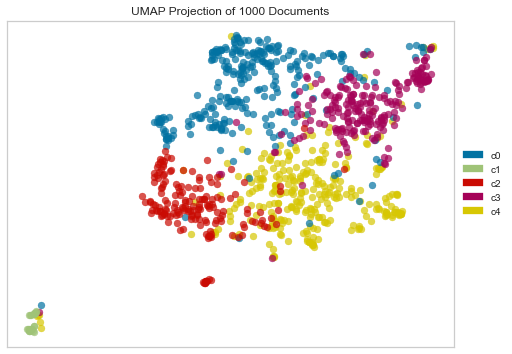

In [ ]:
plot_model(lda, plot = 'umap')

#### Avaliando o modelo.

In [ ]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

#### Tunning através de uma tarefa de classificação.

In [ ]:
tuned_classification = tune_model(
                                  model = 'lda', 
                                  multi_core = True, 
                                  supervised_target = 'status',
                                  fold=3
                                 )

IntProgress(value=0, description='Processing: ', max=25)

Output()

Best Model: Latent Dirichlet Allocation | # Topics: 2 | Accuracy : 0.868


#### Salvando o modelo.

In [ ]:
save_model(lda,'lda_model')

Model Succesfully Saved


(<gensim.models.ldamodel.LdaModel at 0x7fc868611dc0>, 'lda_model.pkl')

#### Carregando o modelo.

In [ ]:
saved_lda = load_model('lda_model')

Model Sucessfully Loaded


In [ ]:
print(saved_lda)

LdaModel(num_terms=4615, num_topics=4, decay=0.5, chunksize=100)
